<a href="https://colab.research.google.com/github/Aryannn2412/Credit-Card-Fraud-Detection/blob/main/Anamoly_Detection_In_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance
import yfinance as yf

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

%config IPCompleter.greedy=True

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
SPY = yf.Ticker("spy")
SPY = SPY.history(period='20y') # max
SPY_open = pd.DataFrame({'close':SPY["Close"]})
# SPY_open.head(10)
SPY_open.tail(10)

,close
Date,
2024-04-24 00:00:00-04:00,505.410004
2024-04-25 00:00:00-04:00,503.489990
2024-04-26 00:00:00-04:00,508.260010
2024-04-29 00:00:00-04:00,510.059998
2024-04-30 00:00:00-04:00,501.980011
2024-05-01 00:00:00-04:00,500.350006
2024-05-02 00:00:00-04:00,505.029999
2024-05-03 00:00:00-04:00,511.290009
2024-05-06 00:00:00-04:00,516.570007


<Axes: xlabel='Date'>

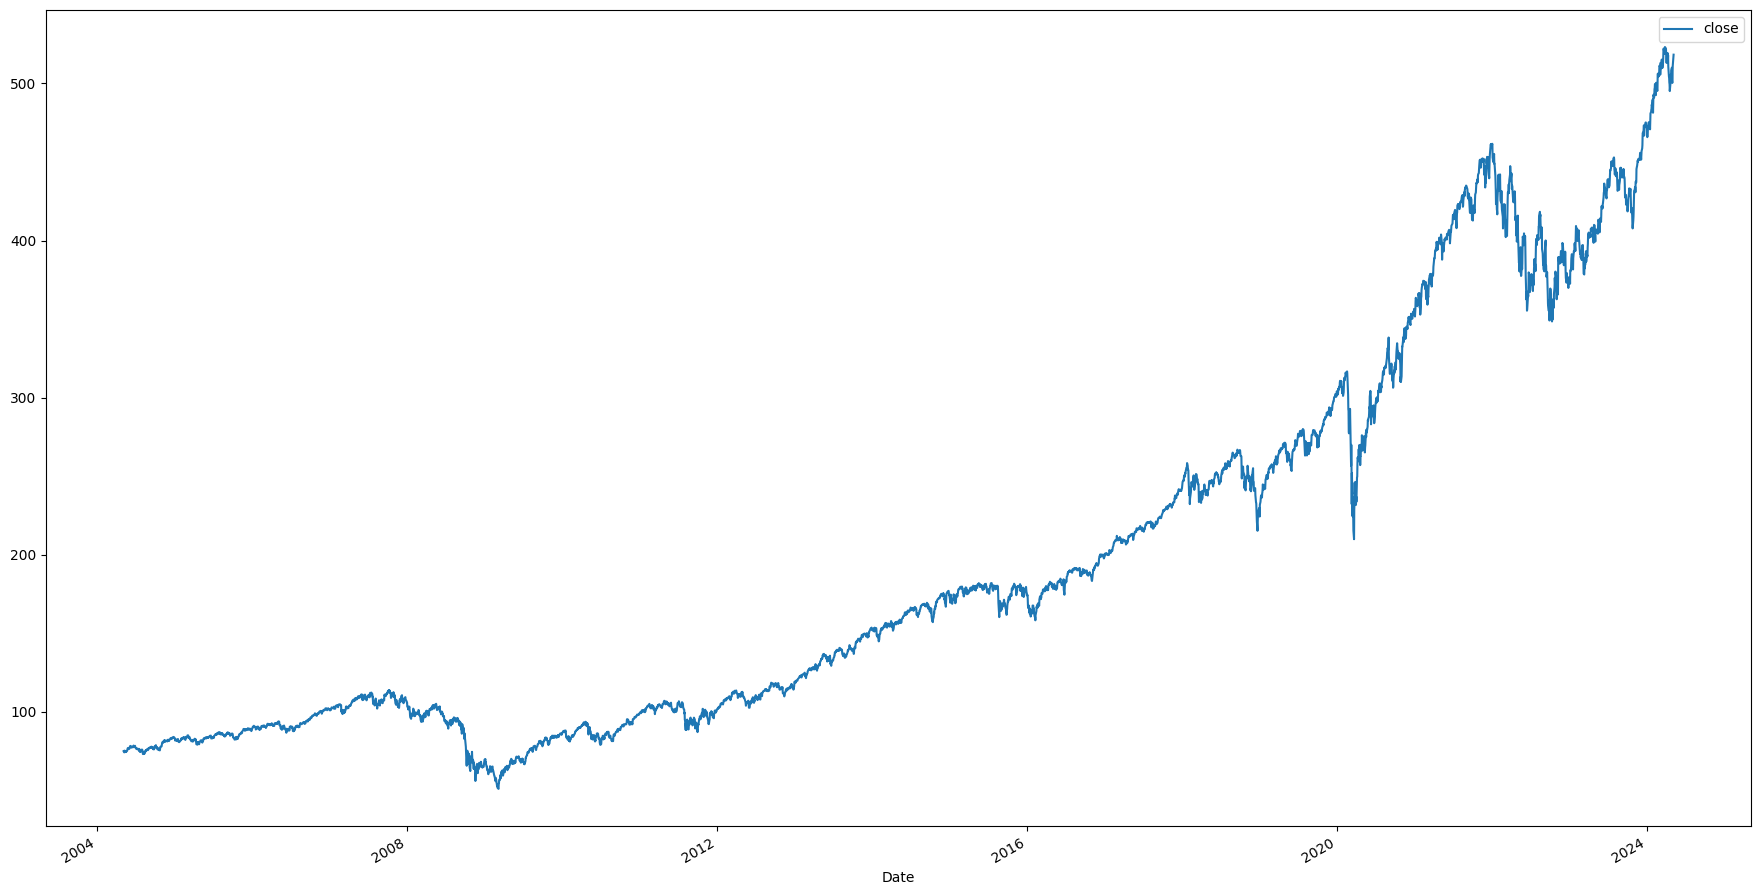

In [4]:
spy = SPY_open
spy.plot(figsize=(22,12), use_index=True)

In [6]:
x= spy.close.values # ndarray
x_nested = x.reshape(-1,1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

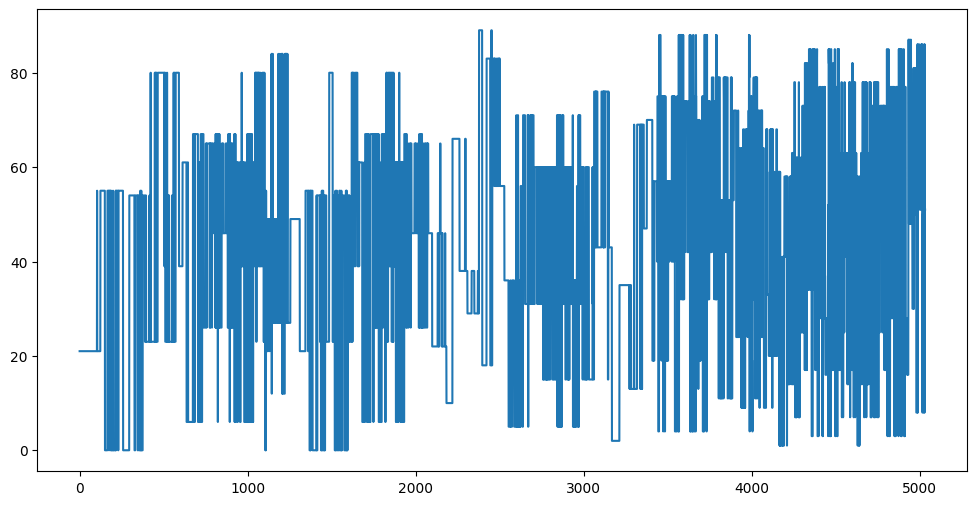

In [7]:
km = KMeans(90).fit(x_nested)
# plt.figure(figsize=(12,6))
# plt.plot(km.cluster_centers_)
# print(np.sort(km.cluster_centers_.reshape(1,-1)[0]))

plt.figure(figsize=(12,6))
plt.plot(range(spy.shape[0]),km.predict(x_nested))

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(x_nested)

GaussianMixture(n_components=5)

In [10]:
pred = gmm.predict(x_nested)
pred_prob = gmm.predict_proba(x_nested)
scores= gmm.score_samples(x_nested)
scoresMean = scores.mean()

In [11]:
itemindex = np.where(pred>0)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'GaussianMixture - S&P 500')

[]

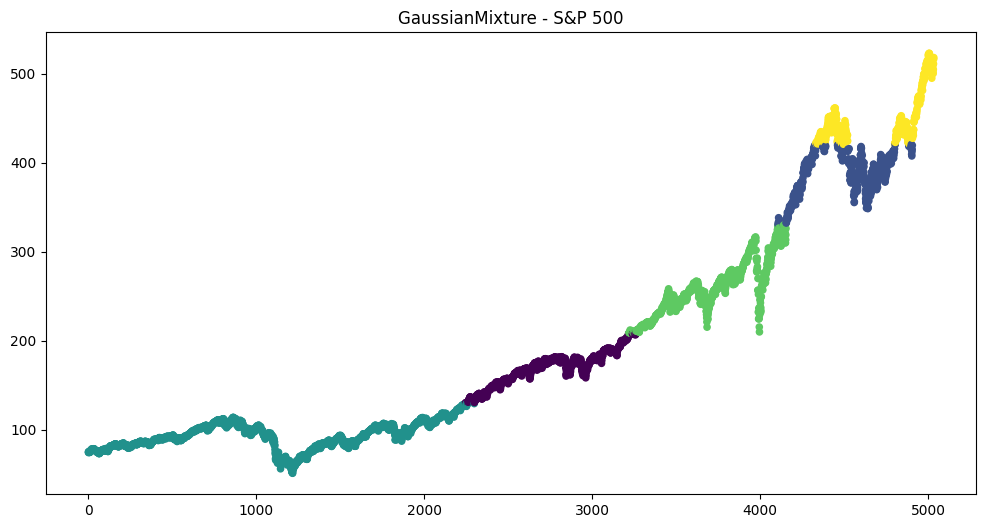

In [12]:
plt.figure(figsize=(12,6))
plt.title("GaussianMixture - S&P 500")
x_axis = range(len(x))
out = plt.scatter(x_axis,y=x,s=20,c=pred) # added c=pred
#plt.scatter(itemindex,x[itemindex],s=20,color='r') #

plt.plot()

In [14]:
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

len of arry:       5034
len of itemindex:  0


<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'OneClassSVM - S&P 500')

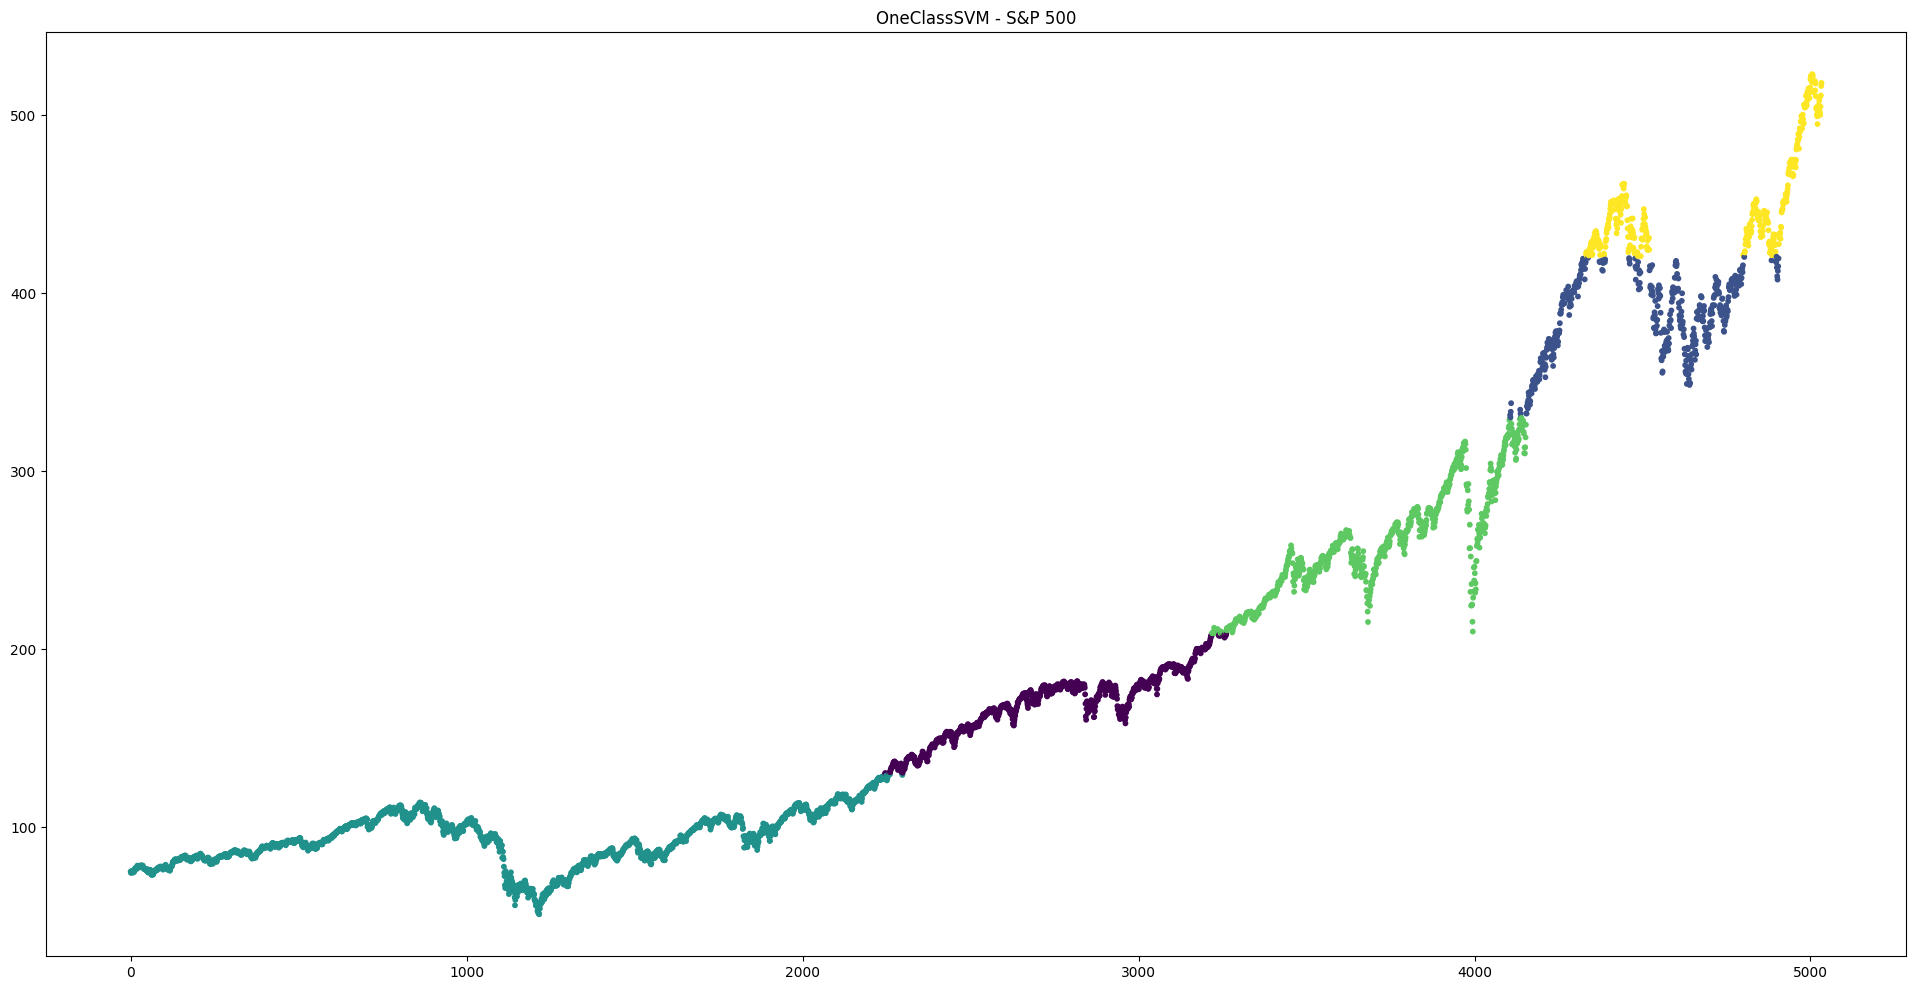

In [15]:
plt.figure(figsize=(24,12))
plt.title("OneClassSVM - S&P 500")
plt.scatter(range(len(x_nested)), x_nested,s=10,c=pred)

<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'OneClassSVM - S&P 500')

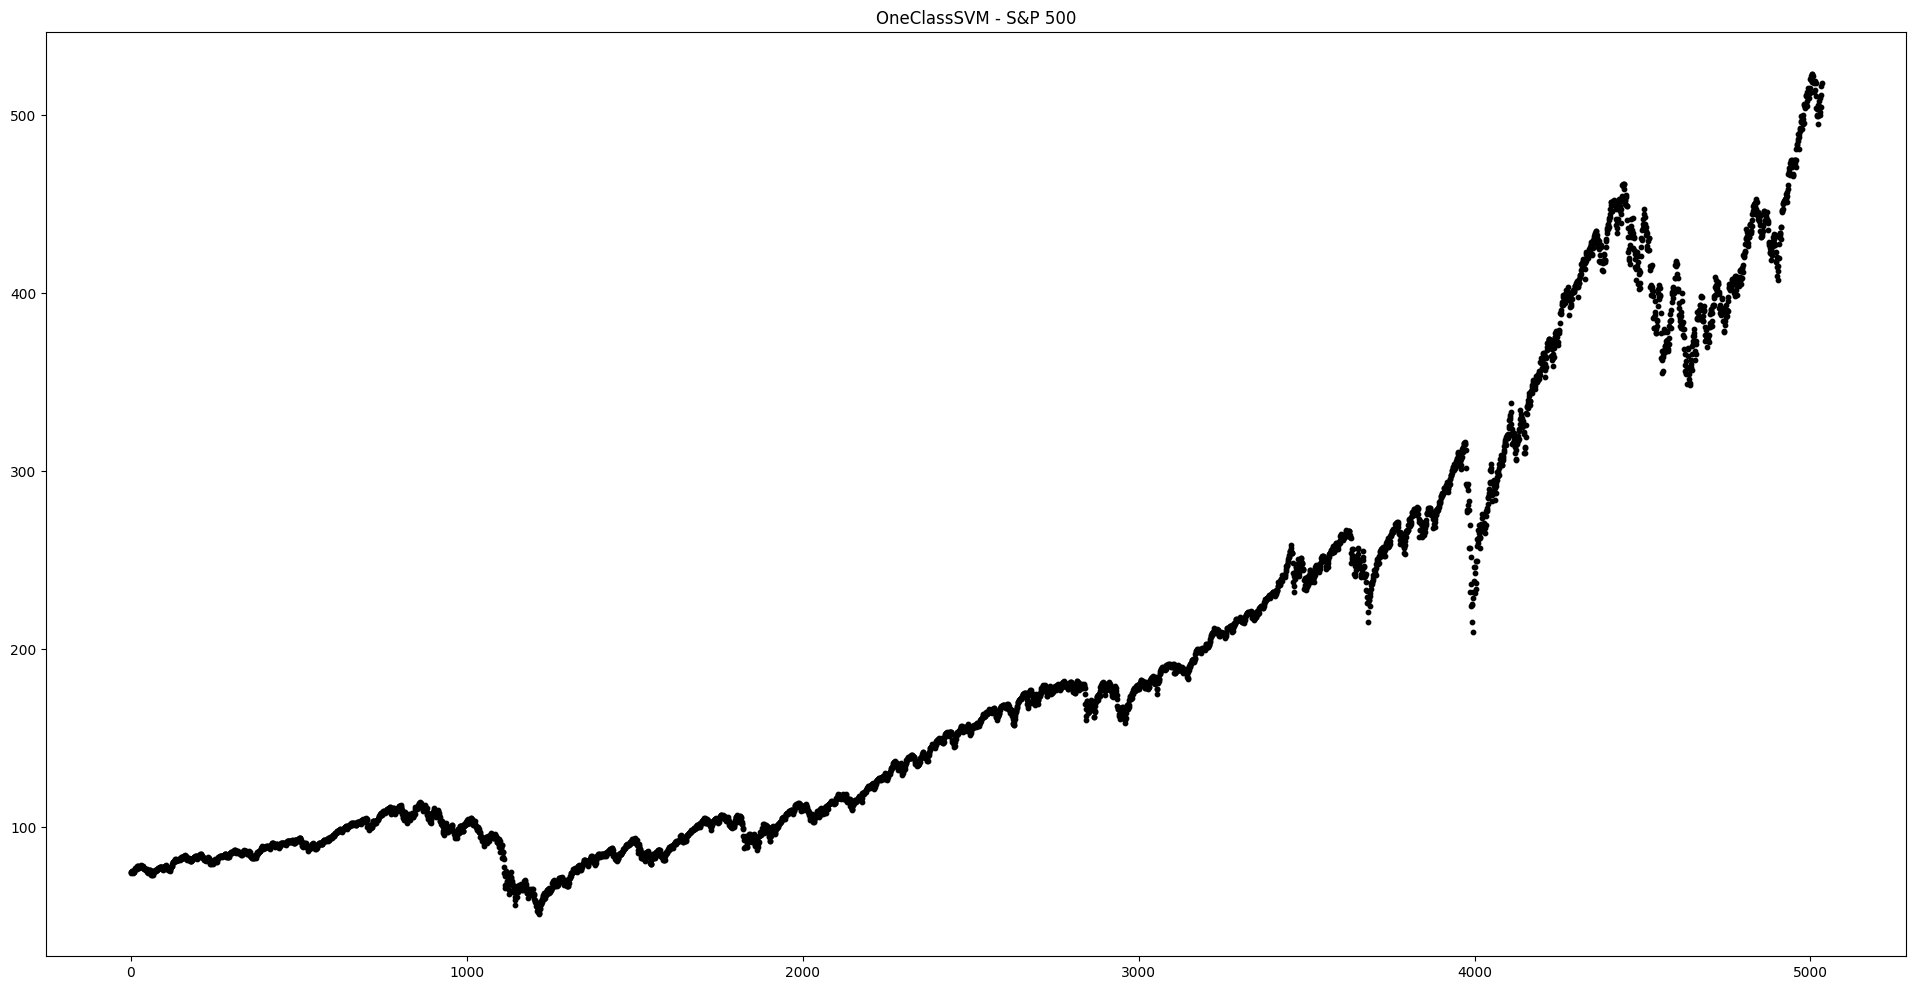

In [16]:
plt.figure(figsize=(24,12))
plt.title("OneClassSVM - S&P 500")
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex],s=10,color='r') #

In [21]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=40, contamination ='auto')
pred = lof.fit_predict(x_nested)

arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

len of arry:       5034
len of itemindex:  56


<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

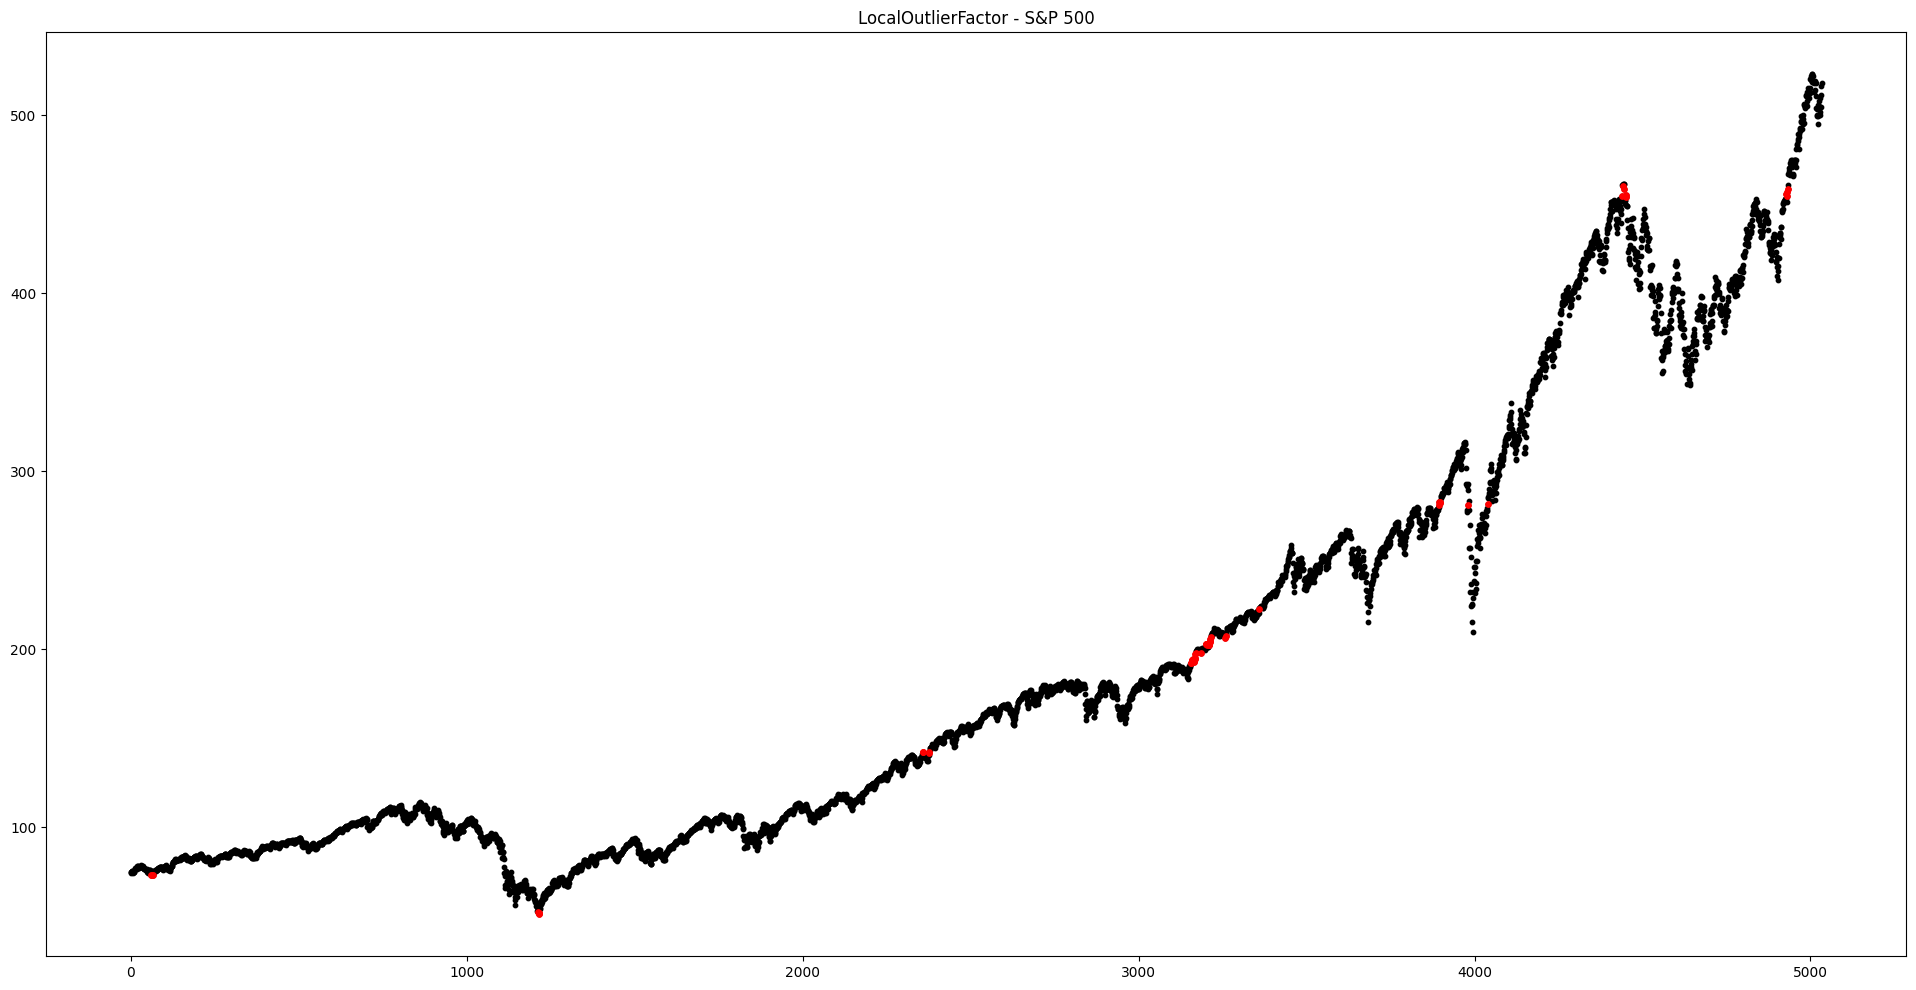

In [22]:
plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=10, c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r') #

len of arry:       5034
len of itemindex:  252


<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

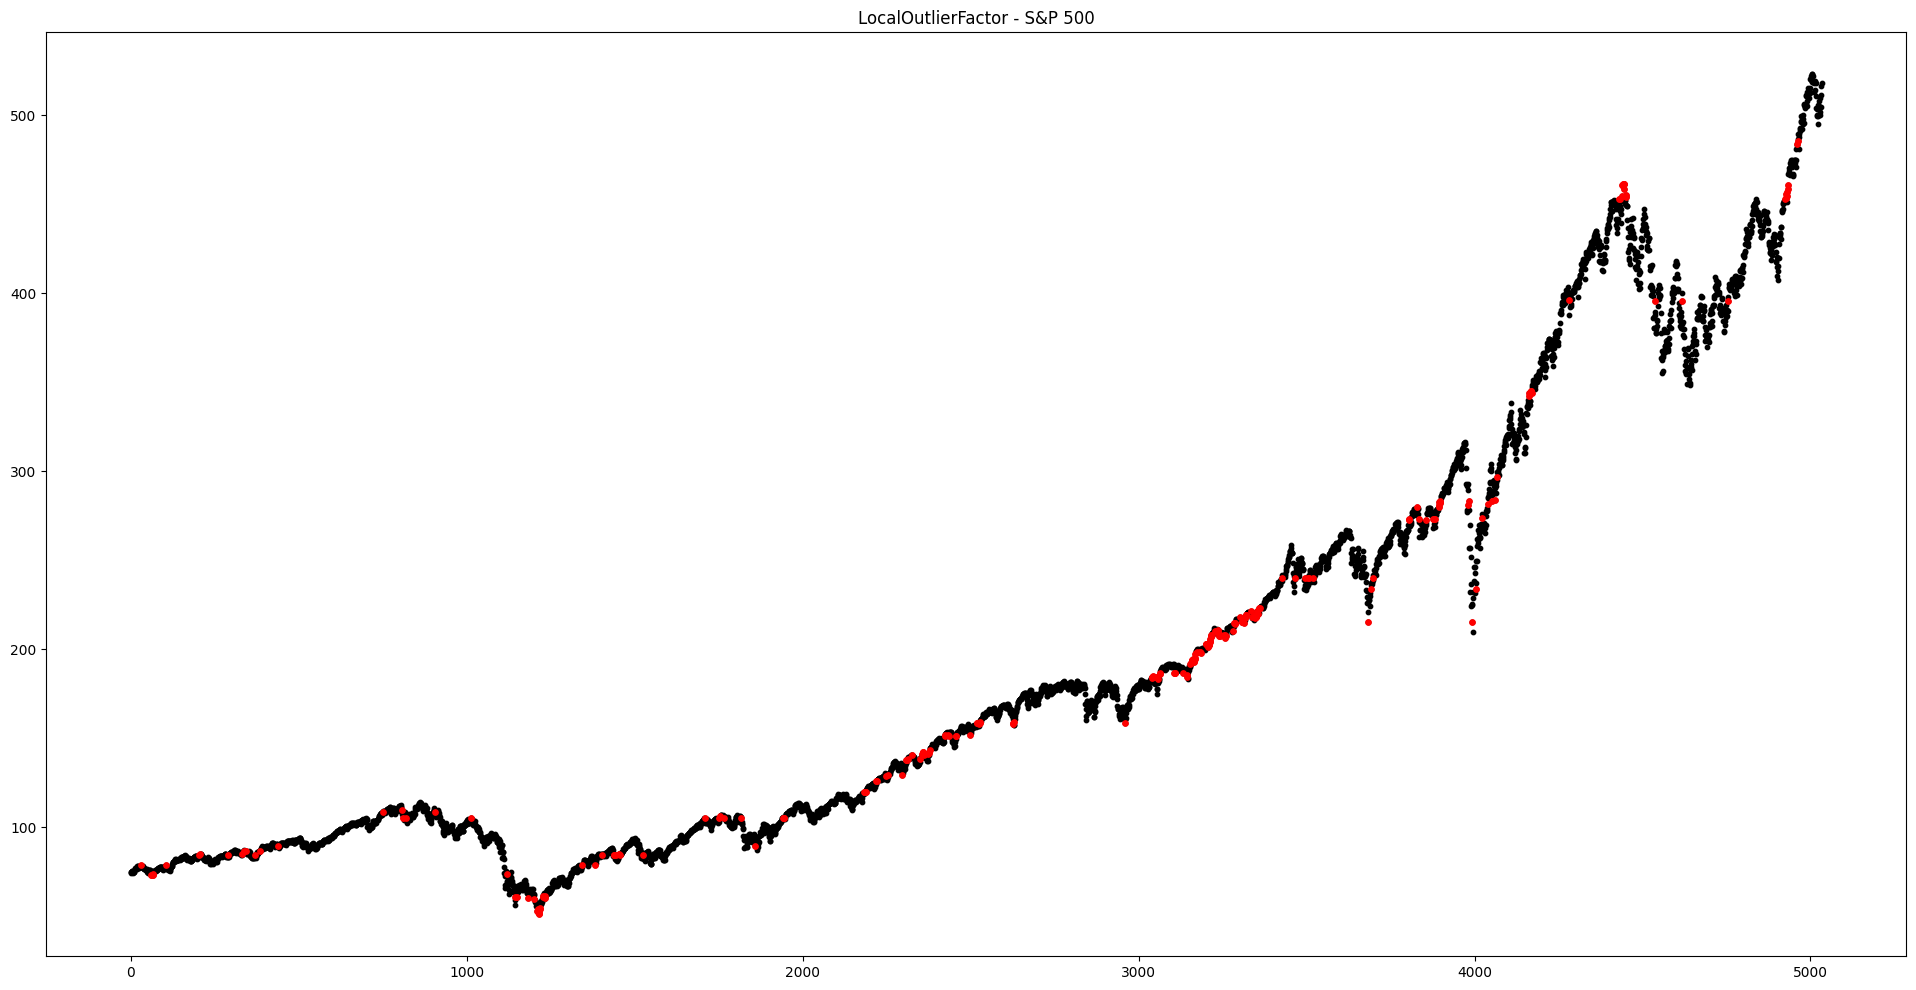

In [23]:
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=40, contamination =0.05) # changed contamination
pred = lof.fit_predict(x_nested)

arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=10, c='k')
plt.scatter(itemindex,x[itemindex],s=15,color='r') #

In [24]:
'''
The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

'''
NOF = lof.negative_outlier_factor_
print(NOF)

'\nThe opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.\n\n'

[-0.99976648 -1.0614374  -0.99284106 ... -0.9769347  -0.97143203
 -1.04529141]


In [25]:
NOF = np.abs( NOF + 1)
NOF_sorted = np.argsort(NOF)
NOF_sorted = NOF_sorted[::-1]
numb_wanted = round(NOF_sorted.shape[0] * 0.05)
contaminated = NOF_sorted[:numb_wanted]
print(contaminated)

[4926 3167 4444 3359 3163 4932 3160 3159 4452 3162 3164 4931 3896 4930
 3168 3161 4039 3158 3214 3898 3895 4439 3212 4443 2357 1216 3169 3165
 2358 3185 3981 3166 3894 2377 3256 3201 1214 1215 3156 3215 3213 3208
 3202 3170 3211 2375 4451 3203 3210 1212   62 3209   66   63 3259 3157
 3320 2359   67 3286 3313 3319 1121 3285 3243 1211  438 3321 3217 3239
 3346 3063 2520 1858 4440 3352 2378 4441 4933 3242 3258 3683 3216 2350
 3355 4051  810 3897 3154 3983 3184 3144 4927 3110 3255 3241 3288 2527
 3287 2310 3183 3880 2312 2499 2519 3805 2220 3218 1344 1213 2432 3876
 3883 2374 3109 4928 4445 3307  104 2356 1227 3830 1817 4446 2627 3339
 2457 4442 3309 3042 1217 1014 3174 3107 2961 3994 1183 2313 4430 4162
 2186 1143 4281 3834 2458 2184 3043 2187 2185 3806 1218 3351 2188 2309
 1709 4161 3240 2221 1525 3053 3362 3360 3145 2325 3041 4168 3857 3318
 2424 2630 3317 1945 4022  821 1150 3064 4170 4538 3237   31 3348  291
 3301 1458 4169 3228 4617 3233 3335  386 3350 3238 3280 1233 3349 3347
 4755 

<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

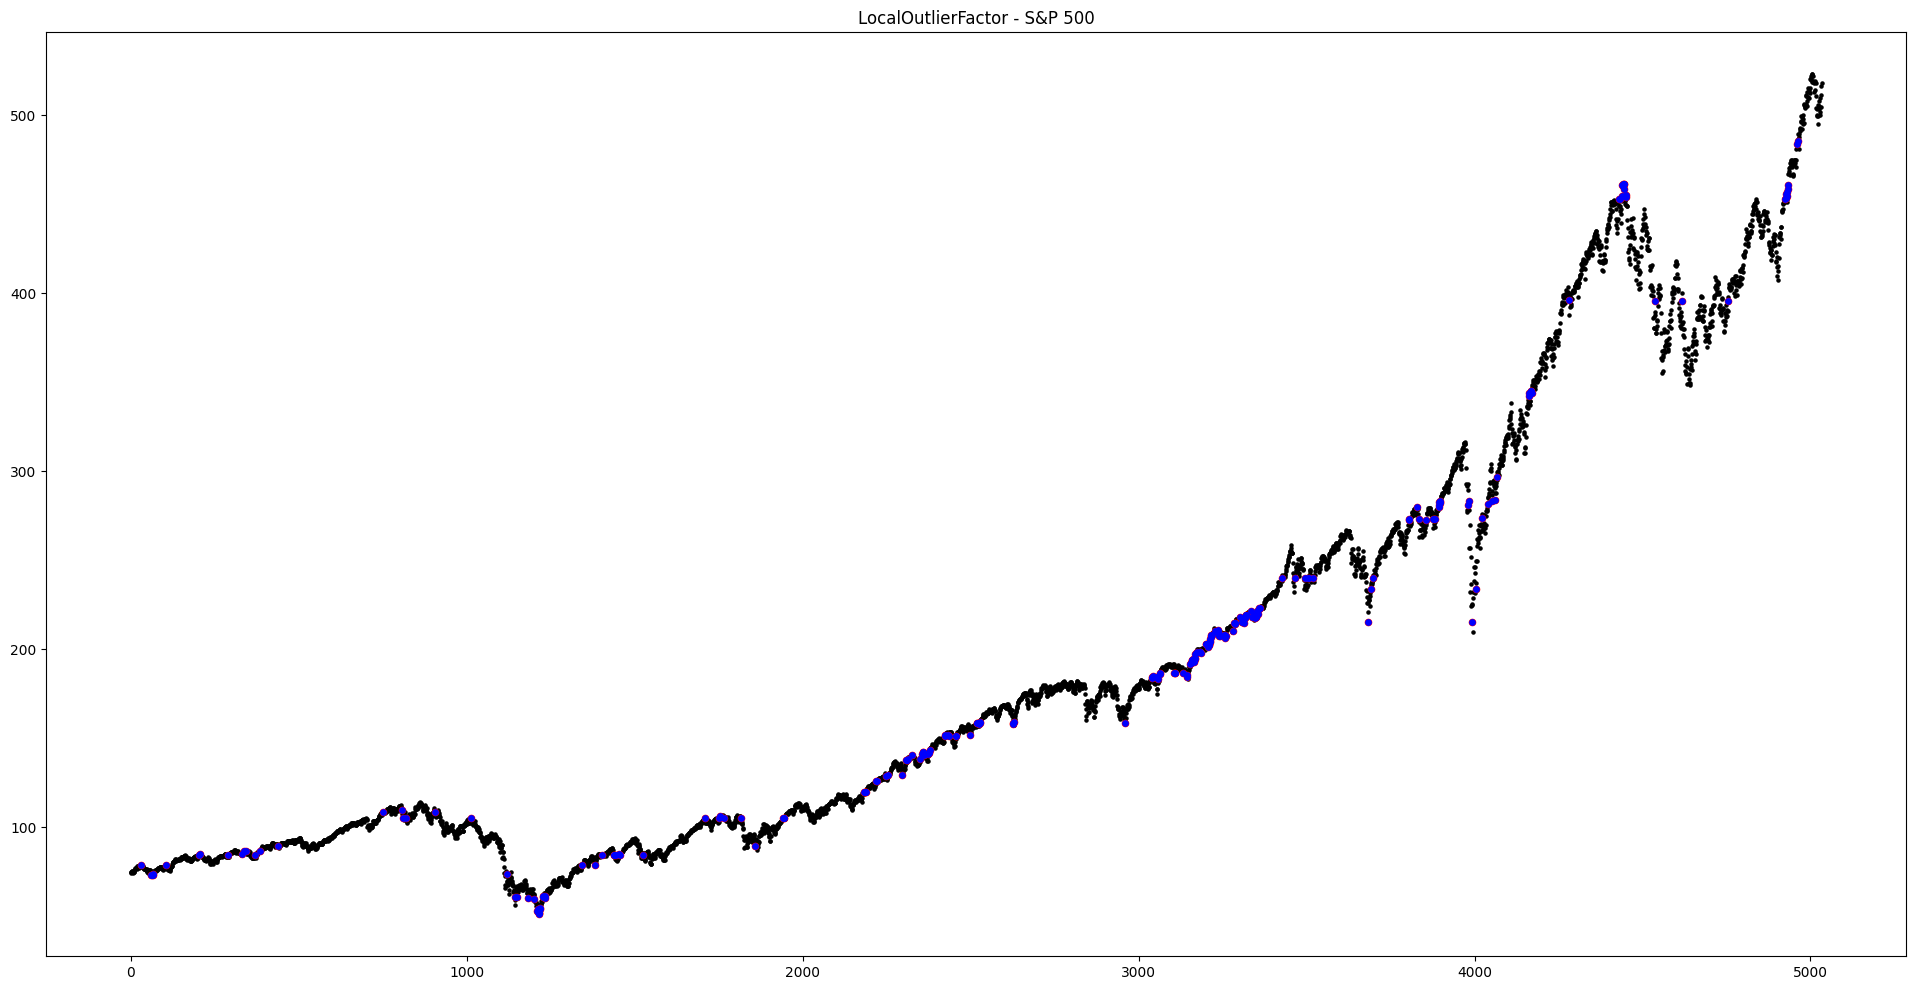

In [26]:
plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=5, c='k', label = "data")
plt.scatter(itemindex,x[itemindex], s=20, color='r', label='AD via predict') #
plt.scatter(contaminated,x_nested[contaminated], s=15, color='b', label = "AD via negative_outlier_factor_") #

In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.55,leaf_size=500)

pred = dbscan.fit_predict(x_nested)
pred = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)

print('\nlen of pred:      ',len(pred))
print('len of itemindex: ',len(itemindex[0]))
arry


len of pred:       5034
len of itemindex:  252


array([1, 1, 1, ..., 1, 1, 1])

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN NOISY SAMPLES - S&P 500')

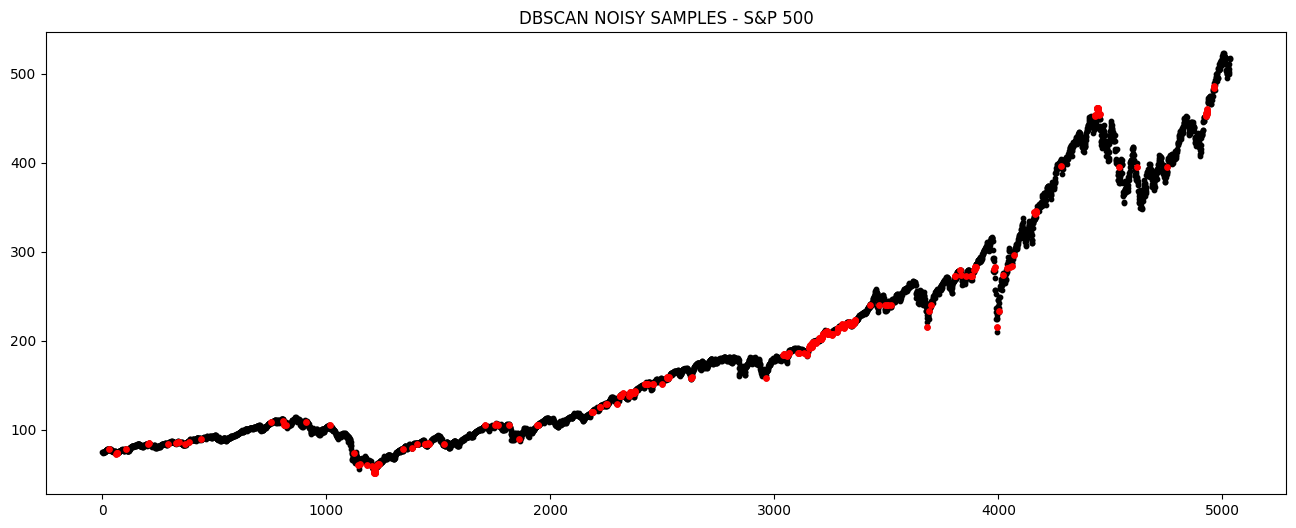

In [28]:
plt.figure(figsize=(16,6))
plt.title("DBSCAN NOISY SAMPLES - S&P 500")
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r') #

Text(0.5, 1.0, 'DBSCAN - S&P 500')

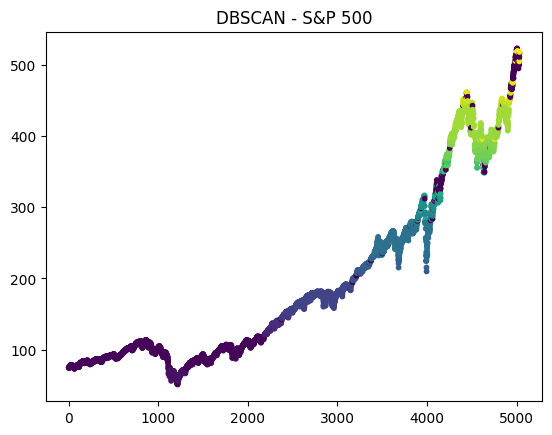

In [29]:
#plt.figure(figsize=(24,12))
plt.title("DBSCAN - S&P 500")
plt.scatter(range(len(x_nested)), x_nested, s=10, c=dbscan.labels_)

In [30]:
x_nested
from collections import Counter
# print(Counter(dbscan.labels_))

array([[ 75.02936554],
       [ 74.25833893],
       [ 74.88604736],
       ...,
       [511.29000854],
       [516.57000732],
       [518.33001709]])

In [31]:
print(len(set(dbscan.labels_)), "clusters....")

66 clusters....


In [32]:
import gc
gc.collect()
!pip install pyod

103

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=3dac89dcfc1979ed3d0894db00d4ca21d4e4f45d08c78d2257155e7c8015ba24
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod



len of arry:     5034
len of itemindex:  252


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x400 with 0 Axes>

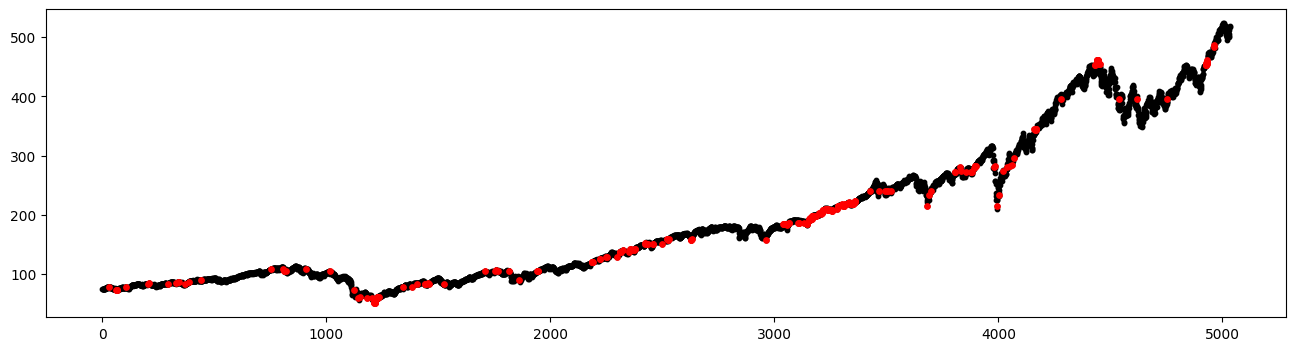

In [33]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
# from pyod.models.auto_encoder import AutoEncoder
from pyod.models.abod import ABOD

lof= LOF(contamination=0.05)
pred=lof.fit_predict(x_nested)
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==1)

print('\nlen of arry:    ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

plt.figure(figsize=(16,4))
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


<Figure size 1600x400 with 0 Axes>

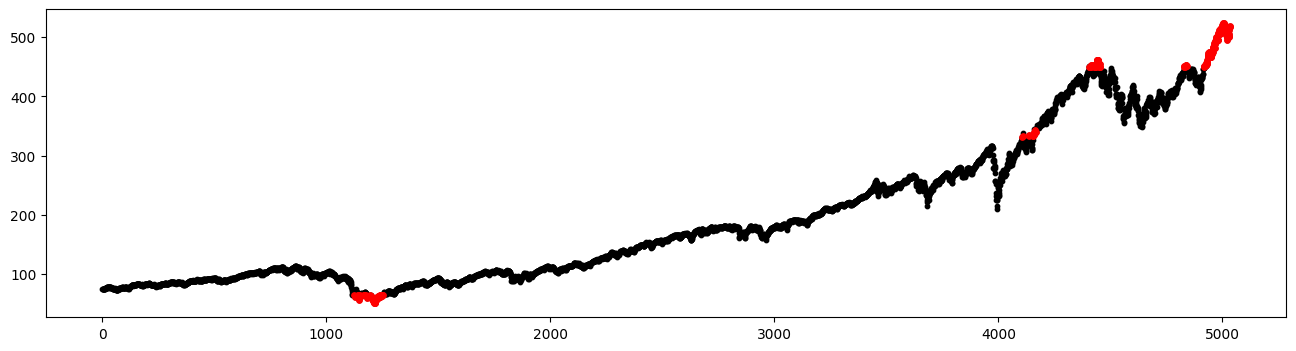

In [34]:
iforest= IForest(contamination=0.05)
pred=iforest.fit_predict(x_nested)
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==1)

plt.figure(figsize=(16,4))
plt.scatter(range(len(x_nested)), x_nested,s=10,c='k')
plt.scatter(itemindex,x[itemindex], s=15, color='r')